In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# * Data Wrangling

#### Tip: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

In [4]:
# load the Data Set 
df=pd.read_csv('KaggleV2-May-2016.csv')
# sample from data 
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# * Introducation 

## Data Identification

### PatientId :
###### The ID of patient
### AppointmentID :
###### The ID of appointment
### Gender
###### the gender of patient, Female or Male.
### ScheduledDay :
###### The day that the patient set up an appointement
### AppointmentDay :
###### The day of the appointment.
### Age :
###### The age of patient
### Neighbourhood :
###### Where the appointment takes place.
### Scholarship :
###### Whether or not the patient is enrolled in Brasilian welfare program Bolsa Família. Value : True/False
### Hipertension :
###### Whetther or not the patient have a hipertension. Values : True/False
### Diabetes :
###### Whetther or not the patient have a Diabetes. Values : True/False
### Alcoholism
###### Whetther or not the patient is a Alcoholism. Values : True/False
### Handcap
###### Whetther or not the patient is a Handcap. Values : True/False
### SMS_received :
###### Number of message sent to the patient.
### No-show :
###### ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.	 

                 -----------------------------------------------------------------

# * Question we could explore

##### Q1: Does the Gender effect the health careing??
##### Q2 how mush patient showed attending accoreding to Appointment??
##### Q3: what are major age got appoiment??
##### Q4: what are highly time for appoiment??
##### Q5: What is the effect of Neighbourhood ??
##### Q6: what is the effect of the SMS- receied on Appointment booking??
##### Q7: what is effect of the Age to missed the appoiment??
##### Q8: what is effect of the Gender to missed the appoiment?

                        ------------------------------------------------------

# * Check & Clean the Data Set

In [5]:
# try to check all the data type before start working on it
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


## incorrect data type  ScheduledDay & AppointmentDay

In [6]:
# fix the data type
df.ScheduledDay=pd.to_datetime(df.ScheduledDay)
df.ScheduledDay.head(1)

0   2016-04-29 18:38:08+00:00
Name: ScheduledDay, dtype: datetime64[ns, UTC]

In [7]:
df.AppointmentDay=pd.to_datetime(df.AppointmentDay)
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29 08:02:16+00:00,2016-04-29 00:00:00+00:00,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,No


In [8]:
# confirmed the data type changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

## correct the AppointmentDay & ScheduledDay to date time data

In [9]:
df.shape

(110527, 14)

In [10]:
#check missing data
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [11]:
# check data duplication
df.duplicated().sum()

0

## No duplicated Data & NO missing Data 

In [12]:
# over Viwe about the data describe
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [ ]:
# the min value at Age column in negative (-1) this incorrected data and making the outlier on data analysis.

In [13]:
df.Age.min()

-1

## from the data discribtion found negative value on Age column & check if we have more

In [14]:
# check how many negative value we have?
df.Age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

## only one negative value ('-1') filter it from the data

In [15]:
# drop this value from data set to keep data on good shape
df.drop(df.query("Age == -1").index,inplace=True)

In [17]:
#check drop the negative value 
df['Age'].value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64

In [18]:
#check the number of rows after drop the incorrected value
df.shape

(110526, 14)

In [19]:
#check the sample from No-show colunm to understand it
df['No-show'].sample(5)

34650     No
31471    Yes
69135     No
51802     No
44933     No
Name: No-show, dtype: object

In [20]:
# calculate the total patient take appointment
total_patient= df['AppointmentID'].count()
total_patient

110526

In [23]:
# how many female patient tack appointment?
total_femal_patient=df.query('Gender== "F"')['AppointmentID'].count()
total_femal_patient

71839

In [22]:
total_femal_patient=df.query('Gender== "F"')['AppointmentID'].count()
total_femal_patient

71839

In [24]:
# how many male patient tack appointment?
total_male_patient=total_patient- total_femal_patient
total_male_patient

38687

In [25]:
# remane No-show column to be easy to use
df.rename(columns={'No-show':'showed'}, inplace=True)
df.showed.head(1)

0    No
Name: showed, dtype: object

In [26]:
# how any patient want to the appointment?
total_patient_showed=df.query('showed== "No"')['AppointmentID'].count()
total_patient_showed

88207

In [27]:
# how any patient didn't go to the appointment?
total_patient_noshowed=df.query('showed=="Yes"')['AppointmentID'].count()
total_patient_noshowed

22319

In [35]:
# describe the schedual & appointment 
df[["ScheduledDay","AppointmentDay"]].describe()

,ScheduledDay,AppointmentDay
count,110526,110526
unique,103548,27
top,2016-05-06 07:09:54+00:00,2016-06-06 00:00:00+00:00
freq,24,4691
first,2015-11-10 07:13:56+00:00,2016-04-29 00:00:00+00:00
last,2016-06-08 20:07:23+00:00,2016-06-08 00:00:00+00:00


In [36]:
# how may patient got appointment and has Hipertension?
precentage_Hipertension_patient= df.Hipertension.sum()/total_patient*100
precentage_Hipertension_patient

19.724770642201836

In [37]:
# how may patient got appointment and has Diabetes?
precentage_Diabetes_patient=df.Diabetes.sum()/total_patient*100
precentage_Diabetes_patient

7.186544342507645

In [38]:
# how may patient got appointment and has HAlcoholism?
precentage_Alcoholism_patient=df.Alcoholism.sum()/total_patient*100
precentage_Alcoholism_patient

3.040008685739102

In [39]:
# how may patient got appointment and has handcap?
precentage_Handcap_patient=df.Handcap.sum()/total_patient*100
precentage_Handcap_patient

2.224815880426325

In [72]:
# how many patient neigbourhood
number_of_Neighbourhood=df.Neighbourhood.nunique()
number_of_Neighbourhood

81

                        ------------------------------------------------------

# * (EDA) Exploratory Data Analysis

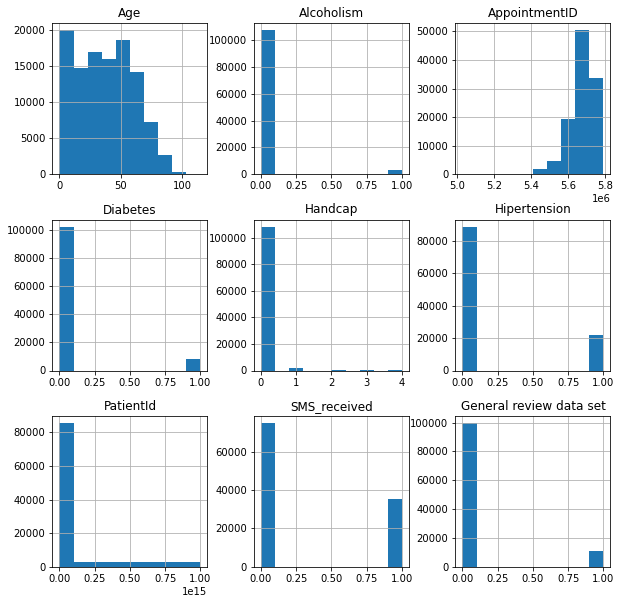

In [40]:
#General visualization for data set
df.hist(figsize=(10,10));
plt.title('General review data set');

## From this over view can see
##### * the most of patient  appointment age between 0 to 60 years
##### *Only 19.7% Alcoholism from patient .
##### *Only  7% are 'Diabetes' , 3%  'Hipertension' & 2 %  Handcap.
##### * the most of them didn't have Scholarship.
##### * the most of them didn't receive the SMS.
##### * they have 81 nighbourhood.
##### * the  ScheduledDay start at 2015-11-10 and ended at 2016-06-08.

# *Q1: Does the Gender effect the health careing??

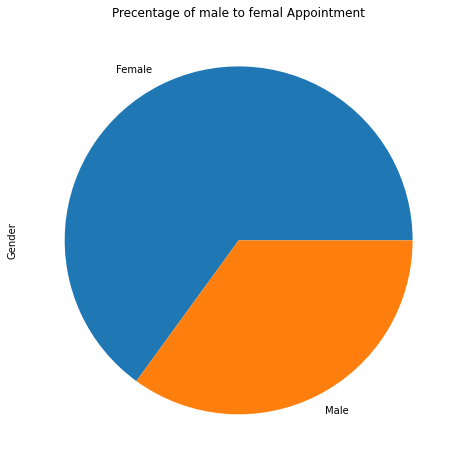

In [47]:
df.Gender.value_counts().plot(kind='pie',labels=['Female','Male'],figsize=(8,8));
plt.title('Precentage of male to femal Appointment');

## From the charts above, we can conclude that Female are the most patients who got medical appointment with 64.9 %.

In [42]:
#calculate thr proportion of female
prop_female= total_femal_patient/ total_patient
prop_female

0.6499737618297957

In [43]:
#calculate thr proportion of male
prop_male= total_male_patient/ total_patient
prop_male

0.3500262381702043

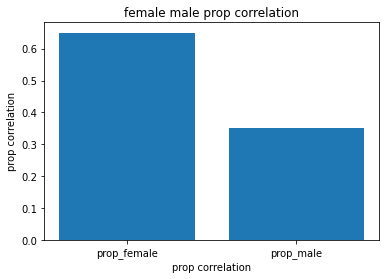

In [46]:
plt.bar([1,2], [prop_female,prop_male], tick_label=['prop_female','prop_male']);
plt.title('female male prop correlation');
plt.xlabel('prop correlation');
plt.ylabel('prop correlation');

## From the Previous chart the proportion of female is approximately duplicate of male . 

# * Q2 how mush patient showed attending accoreding to Appointment???

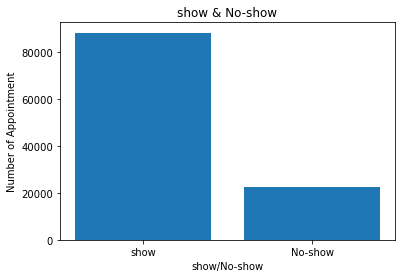

In [48]:
plt.bar([1,2],[total_patient_showed, total_patient_noshowed], tick_label=['show','No-show']);
plt.title('show & No-show');
plt.xlabel('show/No-show');
plt.ylabel('Number of Appointment');

## From chart above can see almost of the patient attended the appointment

# * Q3: what are major age got appoiment?

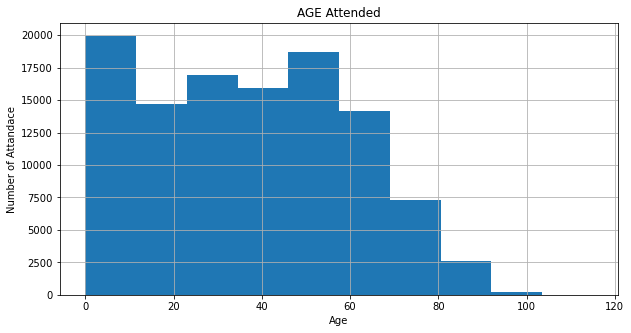

In [33]:
df['Age'].hist(figsize=(10,5));
plt.title('AGE Attended');
plt.xlabel('Age');
plt.ylabel('Number of Attandace');

## the Majore Age attended btween 0 to 60 years

# * Q4: what are highly time for appoiment?

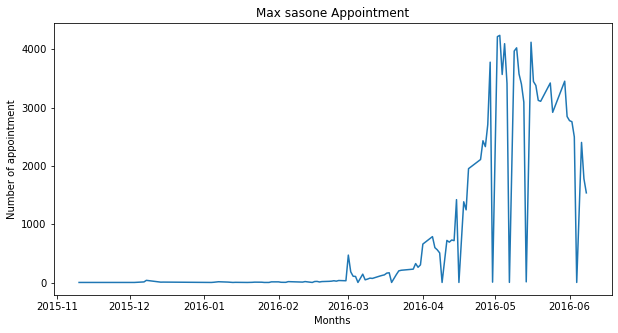

In [50]:
df.ScheduledDay.dt.date.value_counts().plot(kind='line',figsize=(10,5));
plt.title('Max sasone Appointment');
plt.xlabel('Months');
plt.ylabel('Number of appointment');

## From the chart above the highly activity months ('May & June')

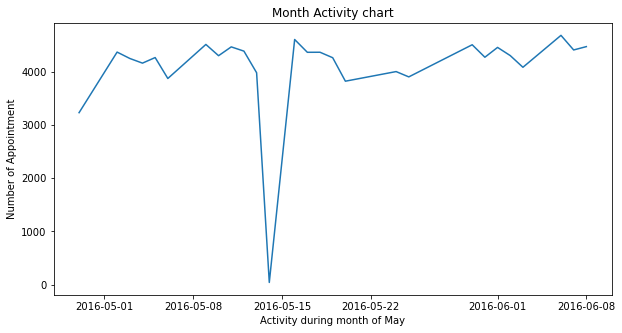

In [52]:
df.AppointmentDay.dt.date.value_counts().plot(kind='line', figsize=(10,5));
plt.title('Month Activity chart');
plt.xlabel('Activity during month of May');
plt.ylabel('Number of Appointment');

## From chart above will find the Max Appointment at the start and end of the month.
## the Min appointment at the middel of the month.


# * Q5: What is the effect of Neighbourhood ??

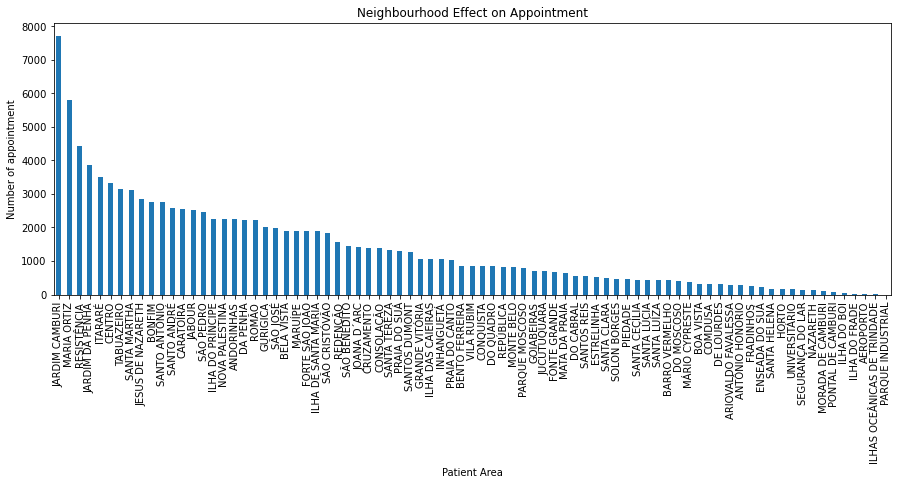

In [53]:
df.Neighbourhood.value_counts().plot(kind='bar', figsize=(15,5));
plt.title('Neighbourhood Effect on Appointment');
plt.xlabel('Patient Area');
plt.ylabel('Number of appointment');

## From the chart above will find postive relationship between neighbourhood zone and the Number of Appointment 

# * Q6: what is the effect of the SMS- received on Appointment booking??

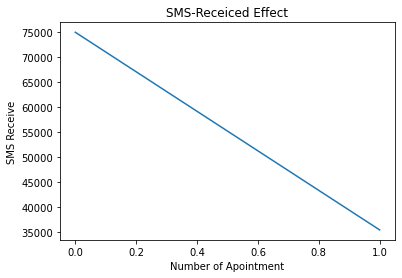

In [54]:
df.SMS_received.value_counts().plot(kind='line');
plt.title('SMS-Receiced Effect');
plt.xlabel('Number of Apointment');
plt.ylabel('SMS Receive');

## We will find an negative relationship between the SMS reciving and Nuper of appointment so this tools is not effective.

In [39]:
df_0= df[['Gender','Age','Neighbourhood','showed']]

In [41]:
df_0

,Gender,Age,Neighbourhood,showed
0,F,62,JARDIM DA PENHA,No
1,M,56,JARDIM DA PENHA,No
2,F,62,MATA DA PRAIA,No
3,F,8,PONTAL DE CAMBURI,No
4,F,56,JARDIM DA PENHA,No
...,...,...,...,...
110522,F,56,MARIA ORTIZ,No
110523,F,51,MARIA ORTIZ,No
110524,F,21,MARIA ORTIZ,No
110525,F,38,MARIA ORTIZ,No


# * Q 6: what is effect of the Age to missed the appoiment?

In [56]:
miss=df['showed']=='Yes'
show=df['showed']=='No'

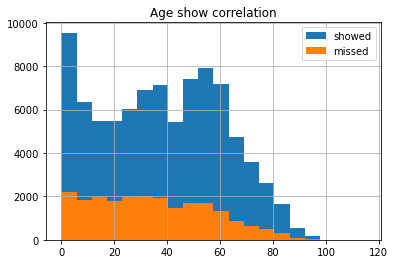

In [62]:
df[show].Age.hist(alpha=1, bins=20,label="showed");
df[miss].Age.hist(alpha=1, bins=20,label="missed");
plt.title('Age show correlation');
plt.legend();

## we can see the age is not effective in Appontment cancelation and also can see the lower cancelation comparing with booking appointment from 0-5 years and from 40-60 years 

# Q8: what is effect of the Gender to missed the appoiment?

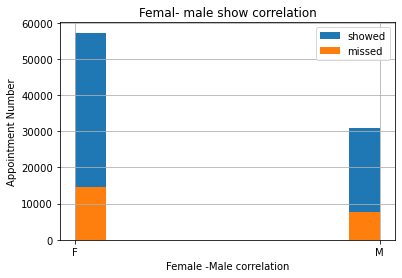

In [63]:
df[show].Gender.hist(alpha=1, bins=10,label="showed");
df[miss].Gender.hist(alpha=1, bins=10,label="missed");
plt.title('Femal- male show correlation');
plt.legend();
plt.xlabel('Female -Male correlation');
plt.ylabel('Appointment Number');

## we can see the Generd effictive on Appointment cancelation and the male is more cancelation comparing with Number of appointoment

                           ------------------------------------------

# * General Data Profiling

In [32]:
pip install pandas-profiling

In [33]:
import pandas_profiling

In [34]:
pandas_profiling.ProfileReport(df)

## Data profiling get us conclusions around the data status and confirmed for us no missing or duplicated rows and making data describting for every variable that hepling us to get overview about all vriable and how to using it

                  ---------------------------------------------------------------------

# * Data Cleaning Conclusions

##### checked all te data type and fixed to correct type helping us to using on the analysis .
##### checking for missing and duplicated data didn't find any of the both.
##### checking for outlir data and got a negative value on Age column and drop it from data set.
##### now the data is ready to analysis and run data set profiling .

                          -----------------------------------------------------

# * Data Analysis Conclusions

##### * the most of medical appointment booking are female.
##### * only 3 % of medical Appointment were cancelation.
##### * almost of medical appointemnt booking between 0-60 years.
##### * the SMS is not effective in the Appointment booking.
##### * the men were cancelation the appointment more than the women.
##### * the patient are colser from medical center were more attended the medical appointment.
##### * Only 19.7% Alcoholism from patient .
##### *Only 7% are 'Diabetes' , 3% 'Hipertension' & 2 % Handcap.

## *Dataset limitation

##### * Some Neigboorhoods don't have enough patients data.
##### * Appointment date doesn't have an actual time but the day only.
##### * Negative value in age column.

                         -------------------------------------------